# Linear regression using `statsmodels`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline

Read in the [Wine Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) dataset.

In [2]:
import os

In [3]:
os.listdir('datasets')

['bcs.csv', 'wine-quality.csv']

In [4]:
Wine = pd.read_csv('datasets/wine-quality.csv',sep =';')
Wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Drop the `density` and `quality` columns.

In [5]:
Wine.drop(columns=['density','quality'], inplace = True)

In [6]:
Wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9


Replace all spaces in the column names with underscores.

In [7]:
Wine.columns = Wine.columns.str.replace(' ', '_')
Wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9


Perform some basic data exploration.

In [8]:
Wine.shape

(4898, 10)

In [9]:
Wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,3.820000,1.080000,14.200000


Explore the data visually.

In [10]:
Wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

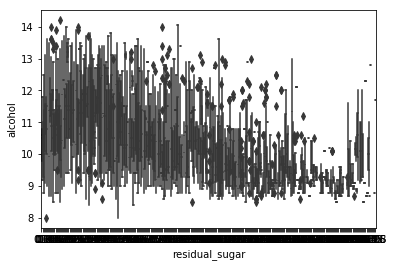

In [13]:
sns.boxplot(x="residual_sugar", y="alcohol",data=Wine, palette="coolwarm")

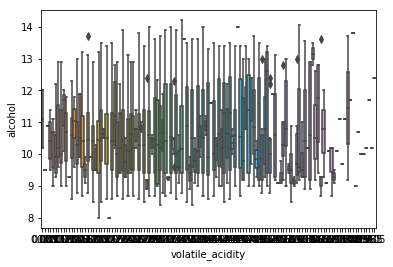

In [14]:
sns.boxplot(x='volatile_acidity', y='alcohol', data=Wine)

C:\Users\Phoenix\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


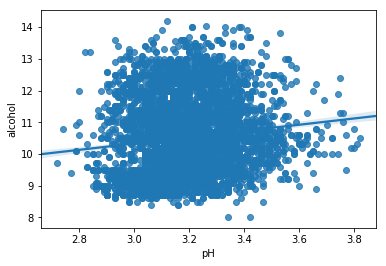

In [15]:
sns.regplot(x='pH', y='alcohol', data=Wine)

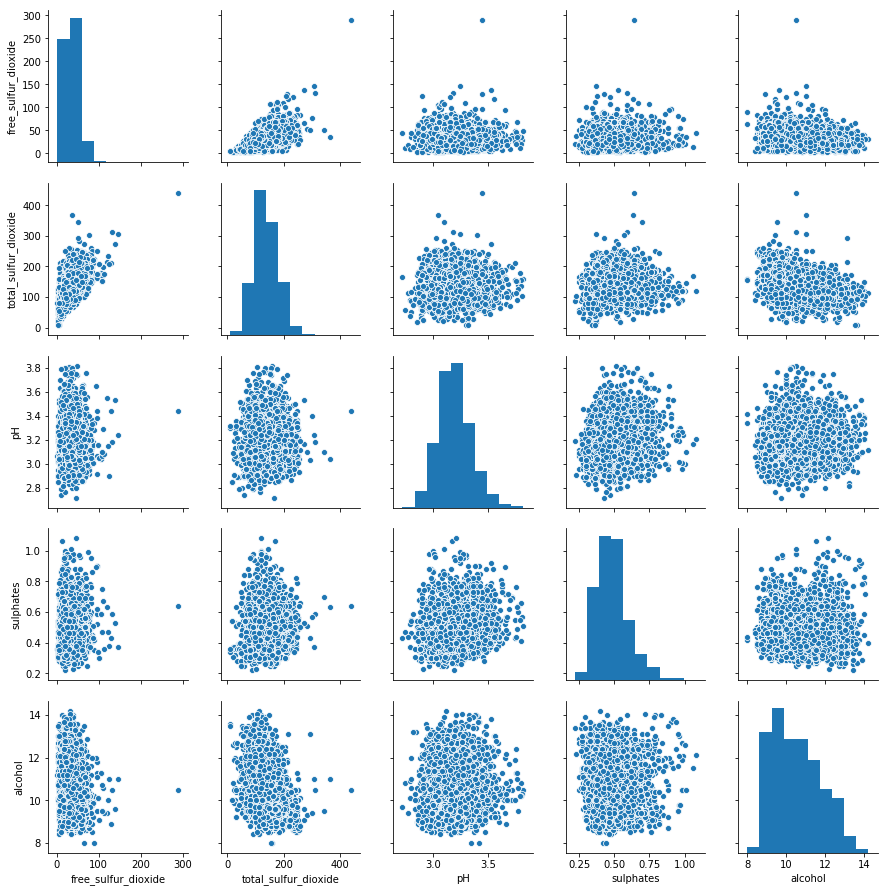

In [16]:
sns.pairplot(Wine[['free_sulfur_dioxide','total_sulfur_dioxide', 'pH','sulphates', 'alcohol']])

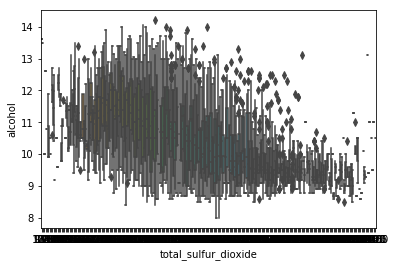

In [17]:
sns.boxplot(x='total_sulfur_dioxide', y='alcohol', data=Wine)

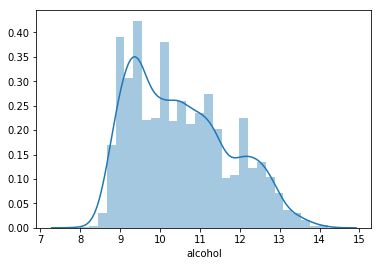

In [18]:
sns.distplot(Wine['alcohol'])

In [19]:
predictors= ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide']

output = 'alcohol'

all_variables = predictors + [output]

Fit a linear regression model for `alcohol` using all predictors.

In [20]:
model = smf.ols(
    'alcohol ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide',
    data=Wine
).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     450.7
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:24:52   Log-Likelihood:                -6746.7
No. Observations:                4898   AIC:                         1.351e+04
Df Residuals:                    4890   BIC:                         1.356e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.7844      0.127    100.276      0.000      12.534      13.034
fixed_acidity           -0.0954      0.017     -5.536      0.000      -0.129      -0.062
volatile_acidity         1.8869      0.142     13.320      0.000       1.609       2.165
citric_acid              0.6321      0.121      5.206      0.000       0.394       0.870
residual_sugar          -0.0798      0.003    -26.847      0.000      -0.086      -0.074
chlorides              -16.4007      0.645    -25.408      0.000     -17.666     -15.135
free_sulfur_dioxide      0.0061      0.001      5.780      0.000       0.004       0.008
total_sulfur_dioxide    -0.0094      0.000    -21.291      0.000      -0.010      -0.009
==============================================================================
Omnibus:                      107.654   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.840
Skew:                           0.346   Prob(JB):                     4.25e-26
Kurtosis:                       3.305   Cond. No.                     7.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print out and interpret the regression coefficients.

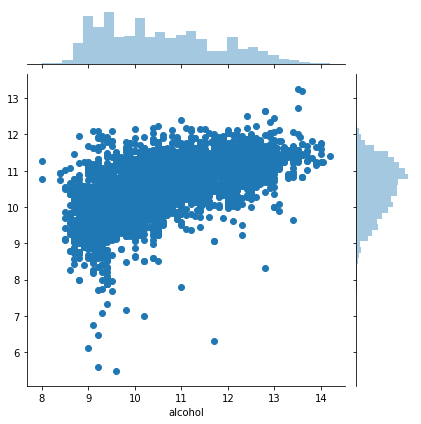

In [22]:
sns.jointplot(Wine[output], model.fittedvalues)

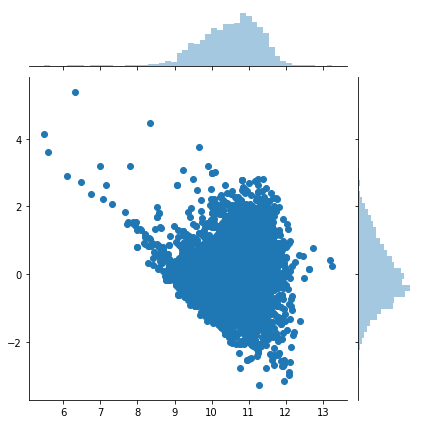

In [23]:
sns.jointplot(model.fittedvalues, model.resid)

Drop predictors that are not statistically significant ($p > 0.05$).

Evaluate the quality of the fit.

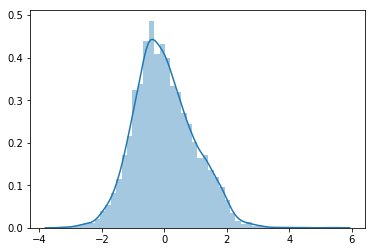

In [24]:
sns.distplot(model.resid)

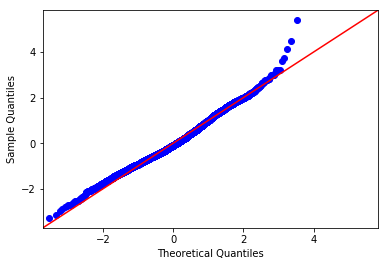

In [25]:
qqplot(model.resid, line='45');